## Initial Tasks
### Importing necessary libraries & setting the random seed

In [ ]:
import torch
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import random
import numpy as np

In [ ]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

## Fetching & Understanding Data

In [ ]:
def get_data():
    train_dataset = datasets.MNIST(root='./data', train=True, transform=None, download=True)
    test_dataset = datasets.MNIST(root='./data', train=False, transform=None, download=True)
    print('Train dataset shape:', train_dataset.data.shape)
    print('Train dataset data type:', train_dataset.data.dtype)
    print('Test dataset shape:', test_dataset.data.shape)
    print('Test dataset data type:', test_dataset.data.dtype)
    print(f"Train dataset Memory Usage: {train_dataset.data.element_size()*train_dataset.data.nelement()/1024/1024:.2f} MB")
    print(f"Test dataset Memory Usage: {test_dataset.data.element_size()*test_dataset.data.nelement()/1024/1024:.2f} MB")
    print()
    plt.imshow(train_dataset[0][0], cmap='gray')
    plt.title(f"A Training Image with Label: {train_dataset[0][1]}")
    plt.show()

    return train_dataset, test_dataset

Train dataset shape: torch.Size([60000, 28, 28])
Train dataset data type: torch.uint8
Test dataset shape: torch.Size([10000, 28, 28])
Test dataset data type: torch.uint8
Train dataset Memory Usage: 44.86 MB
Test dataset Memory Usage: 7.48 MB



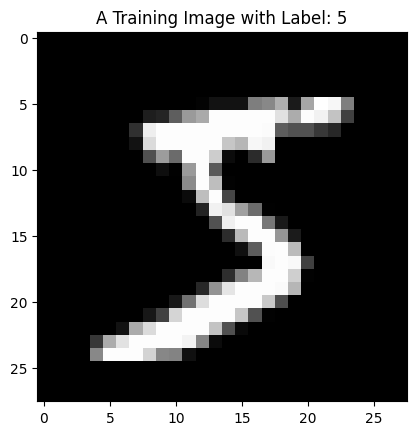

In [ ]:
train_dataset, test_dataset = get_data()

## 1. Linear Autoencoder

In [ ]:
class Linear_Autoencoder(nn.Module):
    def __init__(self, k):
        super(Linear_Autoencoder, self).__init__()
        self.encoder = nn.Linear(784, k) #FC linear layer 784-->k
        self.decoder = nn.Linear(k, 784) #FC linear layer k-->784

    def forward(self, x):
        x = x.view(-1, 784) #reshapes x that is [batch_size, 1, 1, 28 , 28] into a tensor of [batch_size, 784]
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(-1, 1, 28, 28) #reshapes x into the original size of [batch_size, 1, 1, 28 , 28]
        return x

In [ ]:
def train(autoencoder, train_loader, num_epochs, learning_rate):
    criterion = nn.MSELoss() #MSE loss as the data is real valued - as suggested in lecture notes nn9
    optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)
          #Adam is selected as it is the most frequently used in similar studies
    train_loss = [] #this list will store losses by epoch - to be plotted later

    for epoch in range(num_epochs):
        running_loss = 0.0
        for data in train_loader:
            inputs, _ = data
            optimizer.zero_grad()
            outputs = autoencoder(inputs)
            loss = criterion(outputs, inputs) #MSE loss between decoded outputs vs original inputs
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader) #average loss per batch for each epoch
        train_loss.append(epoch_loss) #loss in the epoch is added to the list to be plotted later
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))

    return autoencoder, train_loss

In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
                                                        #ToTensor scales values into [0,1]
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
                                                        #batch size is selected based on batch sizes in similar studies

TRAINING FOR k: 10
Epoch [1/10], Loss: 0.0492
Epoch [2/10], Loss: 0.0351
Epoch [3/10], Loss: 0.0346
Epoch [4/10], Loss: 0.0345
Epoch [5/10], Loss: 0.0345
Epoch [6/10], Loss: 0.0345
Epoch [7/10], Loss: 0.0345
Epoch [8/10], Loss: 0.0345
Epoch [9/10], Loss: 0.0345
Epoch [10/10], Loss: 0.0345


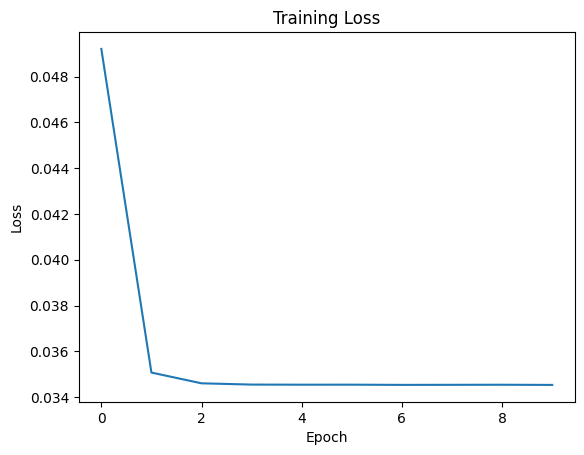


TRAINING FOR k: 50
Epoch [1/10], Loss: 0.0197
Epoch [2/10], Loss: 0.0122
Epoch [3/10], Loss: 0.0121
Epoch [4/10], Loss: 0.0121
Epoch [5/10], Loss: 0.0120
Epoch [6/10], Loss: 0.0120
Epoch [7/10], Loss: 0.0120
Epoch [8/10], Loss: 0.0120
Epoch [9/10], Loss: 0.0120
Epoch [10/10], Loss: 0.0120


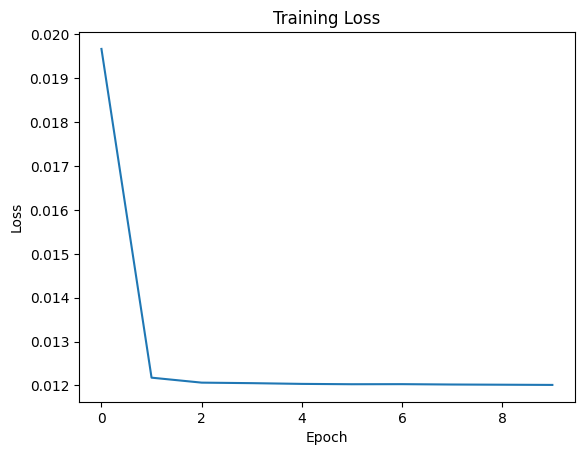


TRAINING FOR k: 100
Epoch [1/10], Loss: 0.0120
Epoch [2/10], Loss: 0.0062
Epoch [3/10], Loss: 0.0061
Epoch [4/10], Loss: 0.0061
Epoch [5/10], Loss: 0.0061
Epoch [6/10], Loss: 0.0060
Epoch [7/10], Loss: 0.0060
Epoch [8/10], Loss: 0.0060
Epoch [9/10], Loss: 0.0060
Epoch [10/10], Loss: 0.0060


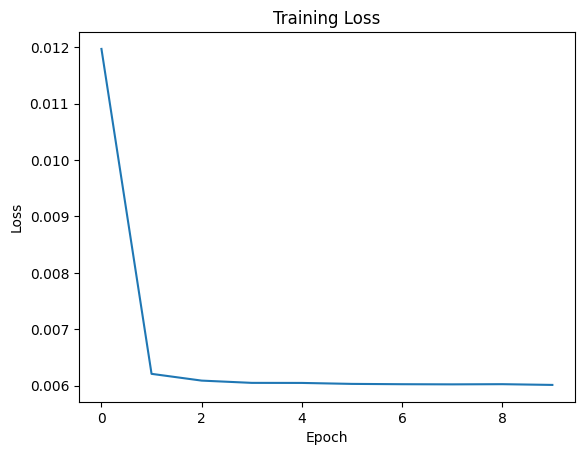

In [ ]:
#this loop will try different values of k

k_list=[10,50,100]
num_epochs = 10 #learning curves show that higher number of epochs would be unnecessary and would risk overfitting
learning_rate = 0.001 #selected based on similar studies
loss_by_k=[] #will store final train losses for each k value

for item in k_list:
  print("TRAINING FOR k:",item)

  autoencoder = Linear_Autoencoder(k=item)
  trained_autoencoder, train_loss = train(autoencoder, train_loader, num_epochs, learning_rate) #trains autoencoder

  loss_by_k.append(train_loss[-1]) #appends loss at the final epoch

  # Plotting the learning curve
  plt.plot(train_loss)
  plt.title("Training Loss")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()

  print()

In [ ]:
k_results = {'k': k_list, 'Final Train Loss': loss_by_k}
results_df = pd.DataFrame(k_results)
results_df

,k,Final Train Loss
0,10,0.034530
1,50,0.012012
2,100,0.006015


In [ ]:
print(trained_autoencoder)

Linear_Autoencoder(
  (encoder): Linear(in_features=784, out_features=100, bias=True)
  (decoder): Linear(in_features=100, out_features=784, bias=True)
)


### Visualization

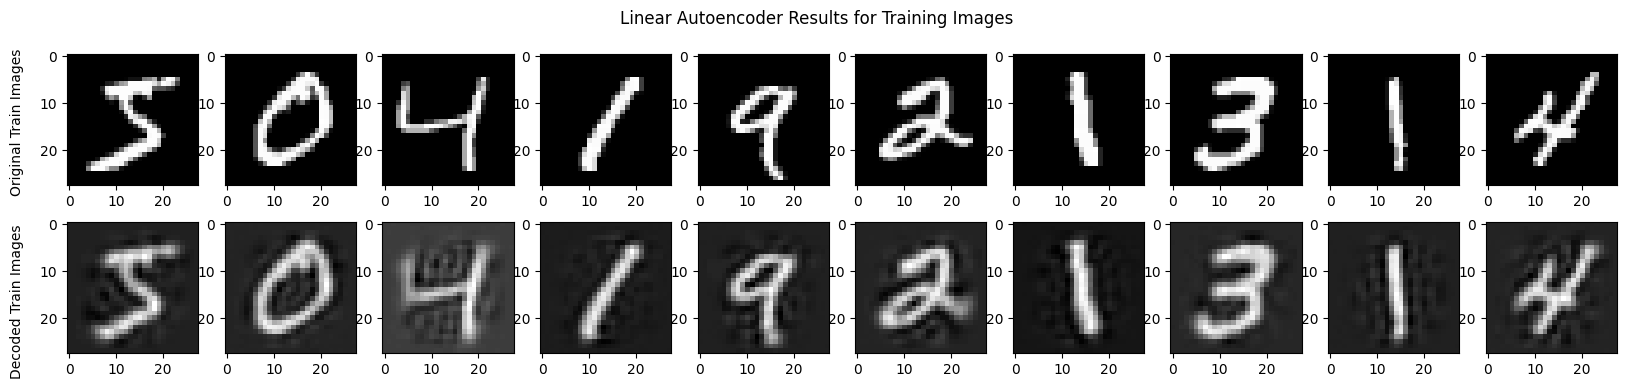

In [ ]:
# for train images

train_images = []
for i in range(10):
    img, label = train_dataset[i]
    train_images.append(img)

train_images = torch.stack(train_images)
encoded_imgs = trained_autoencoder.encoder(train_images.view(-1, 784)) #encodes train images
decoded_imgs = trained_autoencoder.decoder(encoded_imgs).view(-1, 1, 28, 28) #decodes

fig, axs = plt.subplots(2, 10, figsize=(20, 4))
fig.suptitle("Linear Autoencoder Results for Training Images")
fig.text(0.1, 0.7, 'Original Train Images', ha='center', va='center', rotation='vertical')
fig.text(0.1, 0.25, 'Decoded Train Images', ha='center', va='center', rotation='vertical')

for i in range(10):
    axs[0][i].imshow(train_images[i].squeeze(), cmap='gray') #original train images
    axs[1][i].imshow(decoded_imgs[i].detach().squeeze(), cmap='gray') #encoded&decoded train images
plt.show()

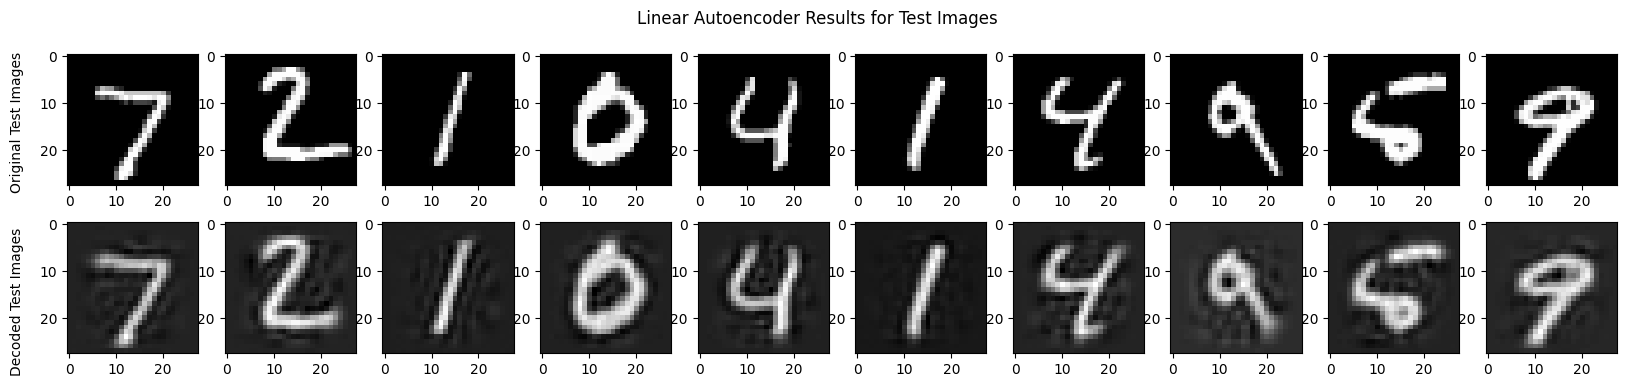

In [ ]:
# for test images

test_images = []
for i in range(10):
    img, label = test_dataset[i]
    test_images.append(img)
test_images = [transforms.ToTensor()(img) for img in test_images] #to use torch.stack - otherwise dimensions dont match
test_images = torch.stack(test_images)
encoded_imgs = trained_autoencoder.encoder(test_images.view(-1, 784)) #encodes test images
decoded_imgs = trained_autoencoder.decoder(encoded_imgs).view(-1, 1, 28, 28) #decodes test images

fig, axs = plt.subplots(2, 10, figsize=(20, 4))
fig.suptitle("Linear Autoencoder Results for Test Images")
fig.text(0.1, 0.7, 'Original Test Images', ha='center', va='center', rotation='vertical')
fig.text(0.1, 0.25, 'Decoded Test Images', ha='center', va='center', rotation='vertical')
for i in range(10):
    axs[0][i].imshow(test_images[i].squeeze(), cmap='gray') #original test images
    axs[1][i].imshow(decoded_imgs[i].detach().squeeze(), cmap='gray') #encoded&decoded test images
plt.show()


## 2. Non-linear Autoencoder

In [ ]:
class NonLinear_Autoencoder(nn.Module):
    def __init__(self, k):
        super(NonLinear_Autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(784, k),nn.ReLU())
                #FC layer 784-->k & ReLu activation for non-linearity
        self.decoder = nn.Sequential(nn.Linear(k, 784),nn.Sigmoid())
                #FC layer k-->784 & Sigmoid activation
    def forward(self, x):
        x = x.view(-1, 784) #reshapes x that is [batch_size, 1, 1, 28 , 28] into a tensor of [batch_size, 784]
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(-1, 1, 28, 28) #reshapes x into the original size of [batch_size, 1, 1, 28 , 28]
        return x

In [ ]:
#the same train function, train_dataset & train_loader will be used

TRAINING FOR k: 10
Epoch [1/10], Loss: 0.0649
Epoch [2/10], Loss: 0.0467
Epoch [3/10], Loss: 0.0446
Epoch [4/10], Loss: 0.0439
Epoch [5/10], Loss: 0.0436
Epoch [6/10], Loss: 0.0433
Epoch [7/10], Loss: 0.0432
Epoch [8/10], Loss: 0.0431
Epoch [9/10], Loss: 0.0430
Epoch [10/10], Loss: 0.0430


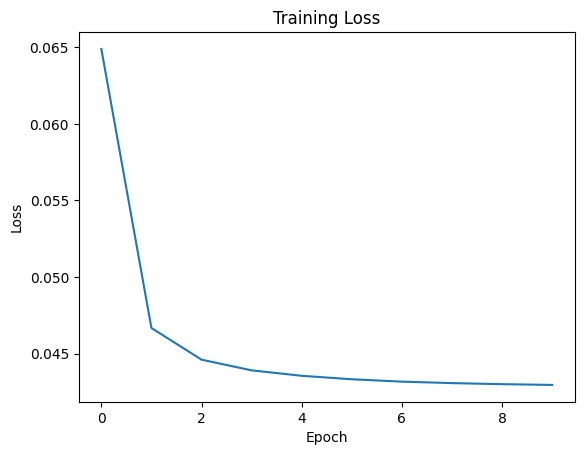


TRAINING FOR k: 50
Epoch [1/10], Loss: 0.0292
Epoch [2/10], Loss: 0.0099
Epoch [3/10], Loss: 0.0079
Epoch [4/10], Loss: 0.0075
Epoch [5/10], Loss: 0.0073
Epoch [6/10], Loss: 0.0072
Epoch [7/10], Loss: 0.0071
Epoch [8/10], Loss: 0.0070
Epoch [9/10], Loss: 0.0069
Epoch [10/10], Loss: 0.0069


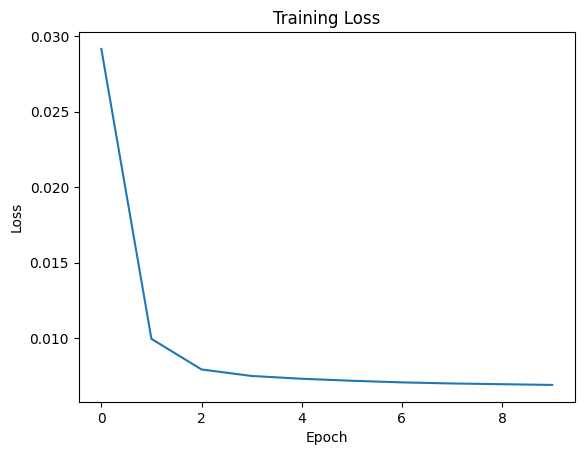


TRAINING FOR k: 100
Epoch [1/10], Loss: 0.0215
Epoch [2/10], Loss: 0.0054
Epoch [3/10], Loss: 0.0038
Epoch [4/10], Loss: 0.0032
Epoch [5/10], Loss: 0.0030
Epoch [6/10], Loss: 0.0029
Epoch [7/10], Loss: 0.0028
Epoch [8/10], Loss: 0.0028
Epoch [9/10], Loss: 0.0027
Epoch [10/10], Loss: 0.0027


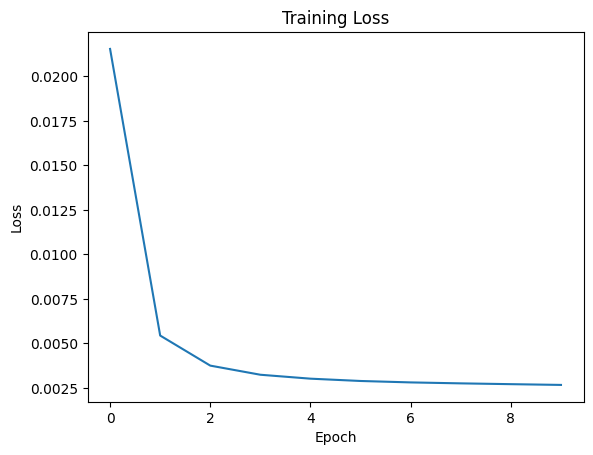

In [ ]:
#this loop will try different values of k

k_list=[10,50,100]
num_epochs = 10 #kept the same as the linear case so that linear vs non-linear autoencoders can be compared fairly
learning_rate = 0.001 #selected based on similar studies & kept the same as the linear case
loss_by_k=[] #will store final train losses for each k value

for item in k_list:
  print("TRAINING FOR k:",item)

  autoencoder = NonLinear_Autoencoder(k=item)
  trained_nonlin_autoencoder, train_loss = train(autoencoder, train_loader, num_epochs, learning_rate) #trains autoencoder

  loss_by_k.append(train_loss[-1]) #appends loss at the final epoch

  # Plotting the learning curve
  plt.plot(train_loss)
  plt.title("Training Loss")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.show()

  print()

In [ ]:
k_results2 = {'k': k_list, 'Final Train Loss (NonLin)': loss_by_k}
results2_df = pd.DataFrame(k_results2)
results2_df

,k,Final Train Loss (NonLin)
0,10,0.042956
1,50,0.006895
2,100,0.002669


In [ ]:
print(trained_nonlin_autoencoder)

NonLinear_Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=100, out_features=784, bias=True)
    (1): Sigmoid()
  )
)


#### Visualization

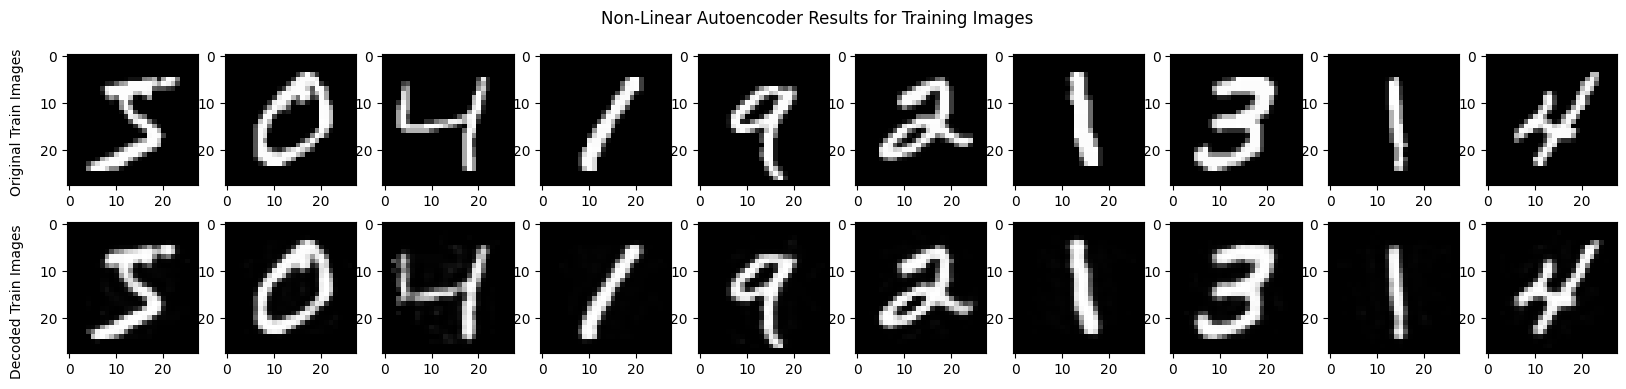

In [ ]:
# for train images

train_images = []
for i in range(10):
    img, label = train_dataset[i]
    train_images.append(img)

train_images = torch.stack(train_images)
encoded_imgs = trained_nonlin_autoencoder.encoder(train_images.view(-1, 784)) #encodes train images
decoded_imgs = trained_nonlin_autoencoder.decoder(encoded_imgs).view(-1, 1, 28, 28) #decodes

fig, axs = plt.subplots(2, 10, figsize=(20, 4))
fig.suptitle("Non-Linear Autoencoder Results for Training Images")
fig.text(0.1, 0.7, 'Original Train Images', ha='center', va='center', rotation='vertical')
fig.text(0.1, 0.25, 'Decoded Train Images', ha='center', va='center', rotation='vertical')

for i in range(10):
    axs[0][i].imshow(train_images[i].squeeze(), cmap='gray') #original train images
    axs[1][i].imshow(decoded_imgs[i].detach().squeeze(), cmap='gray') #encoded&decoded train images
plt.show()

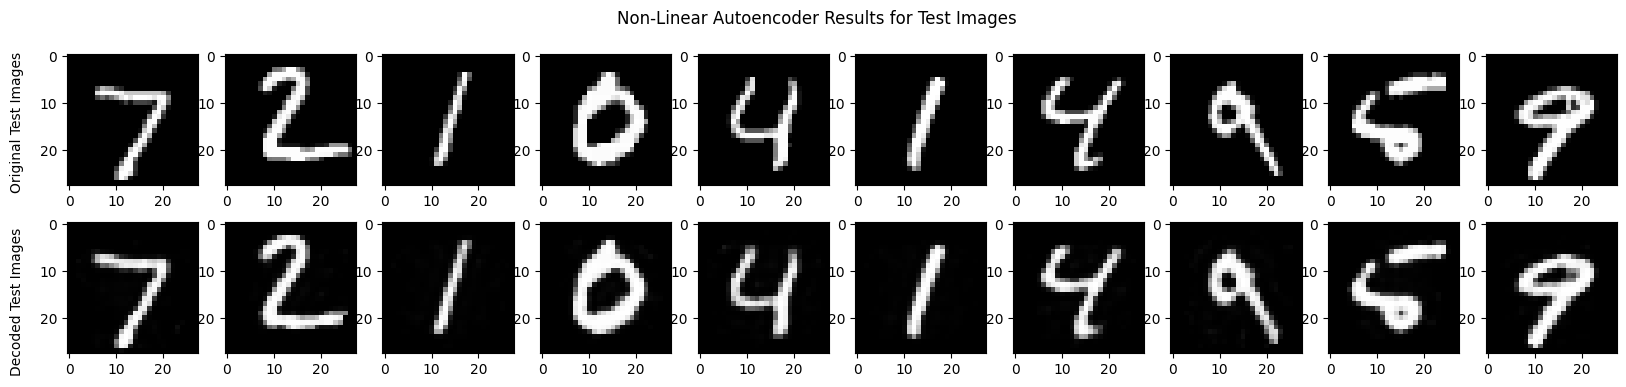

In [ ]:
# for test images

test_images = []
for i in range(10):
    img, label = test_dataset[i]
    test_images.append(img)
test_images = [transforms.ToTensor()(img) for img in test_images] #to use torch.stack - otherwise dimensions dont match
test_images = torch.stack(test_images)
encoded_imgs = trained_nonlin_autoencoder.encoder(test_images.view(-1, 784)) #encodes test images
decoded_imgs = trained_nonlin_autoencoder.decoder(encoded_imgs).view(-1, 1, 28, 28) #decodes test images

fig, axs = plt.subplots(2, 10, figsize=(20, 4))
fig.suptitle("Non-Linear Autoencoder Results for Test Images")
fig.text(0.1, 0.7, 'Original Test Images', ha='center', va='center', rotation='vertical')
fig.text(0.1, 0.25, 'Decoded Test Images', ha='center', va='center', rotation='vertical')
for i in range(10):
    axs[0][i].imshow(test_images[i].squeeze(), cmap='gray') #original test images
    axs[1][i].imshow(decoded_imgs[i].detach().squeeze(), cmap='gray') #encoded&decoded test images
plt.show()


## 3. Stacked Autoencoder

In [ ]:
class Stacked_Autoencoder(nn.Module):
    def __init__(self):
        super(Stacked_Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), #1-->16, 3x3 filters
                                                      #1 since the MNIST Dataset is Grayscale
            nn.ReLU(), #for non-linearity
            nn.Conv2d(16, 32, 3, stride=2, padding=1), #16-->32, 3x3 filters
            nn.ReLU() #for non-linearity
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            #ConvTranspose for upsampling, 32-->16, 3x3 filters
            #output padding is an additional padding - to help match dimensions through the layers
            nn.ReLU(), #for non-linearity
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            #ConvTranspose for upsampling, 32-->16, 3x3 filters
            #output padding is an additional padding - to help match dimensions through the layers
            nn.Sigmoid() #recommended for the decoder for real-valued inputs - Lecture Notes NN9
        )

    def forward(self, x):
      #as conv layers are used, there is no need to reshape the images here
        x = self.encoder(x)
        x = self.decoder(x)
        return x

Epoch [1/10], Loss: 0.0093
Epoch [2/10], Loss: 0.0007
Epoch [3/10], Loss: 0.0005
Epoch [4/10], Loss: 0.0004
Epoch [5/10], Loss: 0.0003
Epoch [6/10], Loss: 0.0003
Epoch [7/10], Loss: 0.0003
Epoch [8/10], Loss: 0.0003
Epoch [9/10], Loss: 0.0003
Epoch [10/10], Loss: 0.0003


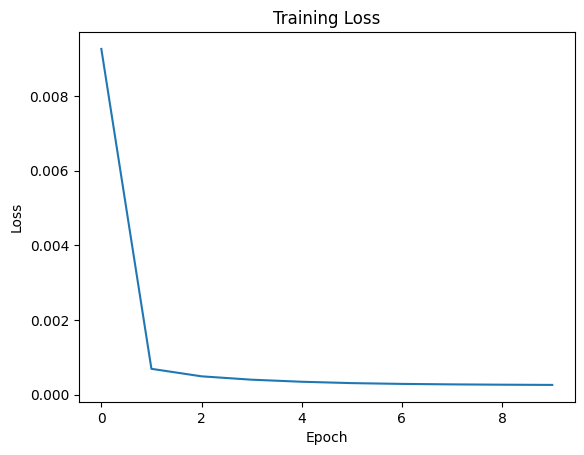

In [ ]:
autoencoder = Stacked_Autoencoder()
trained_stacked_autoencoder, train_loss = train(autoencoder, train_loader, num_epochs=10, learning_rate=0.001)

plt.plot(train_loss)
plt.title("Training Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
print(trained_stacked_autoencoder)

Stacked_Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): Sigmoid()
  )
)


#### Visualization

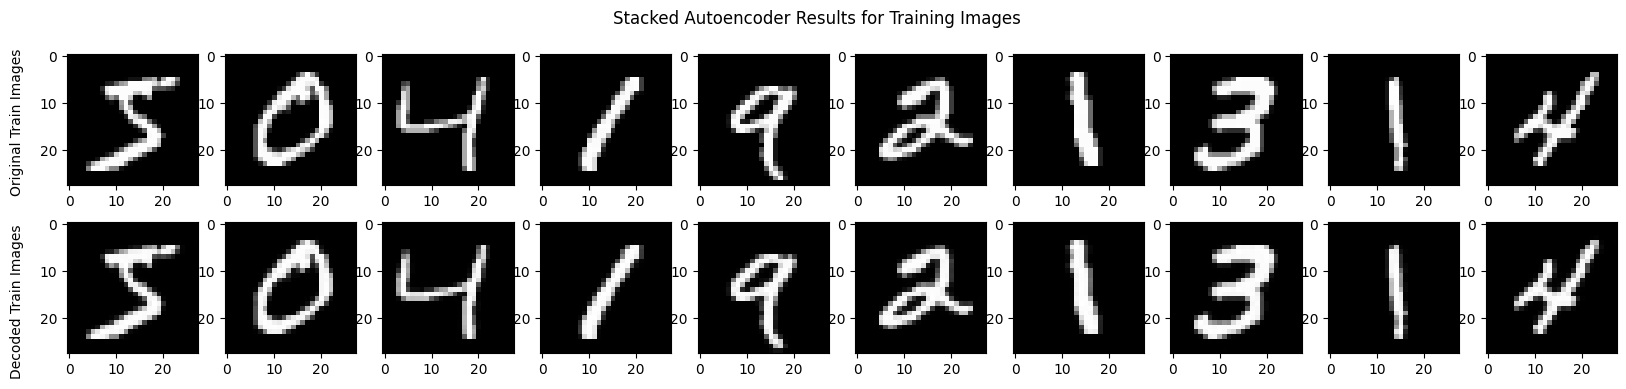

In [ ]:
# for train images

train_images = []
for i in range(10):
    img, label = train_dataset[i]
    train_images.append(img)

train_images = torch.stack(train_images)
encoded_imgs = trained_stacked_autoencoder.encoder(train_images) #encodes train images
decoded_imgs = trained_stacked_autoencoder.decoder(encoded_imgs) #decodes

fig, axs = plt.subplots(2, 10, figsize=(20, 4))
fig.suptitle("Stacked Autoencoder Results for Training Images")
fig.text(0.1, 0.7, 'Original Train Images', ha='center', va='center', rotation='vertical')
fig.text(0.1, 0.25, 'Decoded Train Images', ha='center', va='center', rotation='vertical')

for i in range(10):
    axs[0][i].imshow(train_images[i].squeeze(), cmap='gray') #original train images
    axs[1][i].imshow(decoded_imgs[i].detach().squeeze(), cmap='gray') #encoded&decoded train images
plt.show()

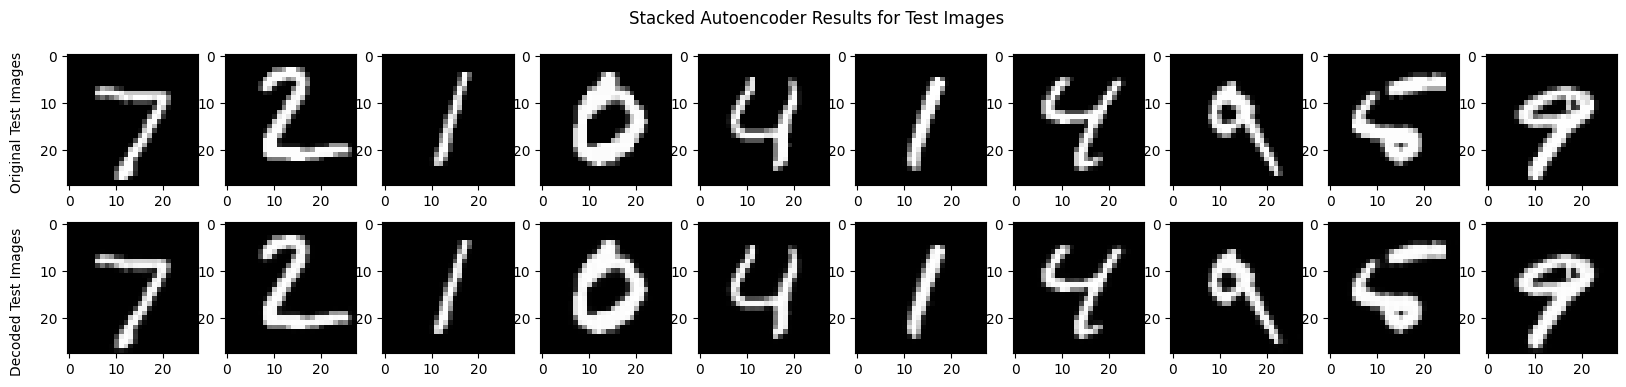

In [ ]:
# for test images

test_images = []
for i in range(10):
    img, label = test_dataset[i]
    test_images.append(img)
test_images = [transforms.ToTensor()(img) for img in test_images] #to use torch.stack - otherwise dimensions dont match
test_images = torch.stack(test_images)
encoded_imgs = trained_stacked_autoencoder.encoder(test_images) #encodes test images
decoded_imgs = trained_stacked_autoencoder.decoder(encoded_imgs) #decodes test images

fig, axs = plt.subplots(2, 10, figsize=(20, 4))
fig.suptitle("Stacked Autoencoder Results for Test Images")
fig.text(0.1, 0.7, 'Original Test Images', ha='center', va='center', rotation='vertical')
fig.text(0.1, 0.25, 'Decoded Test Images', ha='center', va='center', rotation='vertical')
for i in range(10):
    axs[0][i].imshow(test_images[i].squeeze(), cmap='gray') #original test images
    axs[1][i].imshow(decoded_imgs[i].detach().squeeze(), cmap='gray') #encoded&decoded test images
plt.show()


## 4. Denoising Autoencoder

In [ ]:
#will use the same Stacked_Encoder but a different train function

def add_noise(img, noise_factor,device): #adds noise to input images
    img_noisy = img + noise_factor * torch.randn_like(img).to(device)
    img_noisy = img_noisy.clamp(0., 1.)
    return img_noisy

def train_denoising(autoencoder, train_loader, num_epochs=20, learning_rate=0.001, device='cuda'):
    autoencoder.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)
    losses = []

    for epoch in range(num_epochs):
        epoch_loss = 0
        for data in train_loader:
            img, _ = data
            img_noisy = add_noise(img, noise_factor,device)
            img, img_noisy = img.to(device), img_noisy.to(device)
            optimizer.zero_grad()
            outputs = autoencoder(img_noisy) #training is done on noisy images
            loss = criterion(outputs, img) #the objective function is still
                                          #the MSE between original images and outputs
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        epoch_loss /= len(train_loader) #average loss per batch for each epoch
        losses.append(epoch_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.show()

    return losses, autoencoder

Epoch [1/10], Loss: 0.0106
Epoch [2/10], Loss: 0.0044
Epoch [3/10], Loss: 0.0042
Epoch [4/10], Loss: 0.0041
Epoch [5/10], Loss: 0.0041
Epoch [6/10], Loss: 0.0040
Epoch [7/10], Loss: 0.0040
Epoch [8/10], Loss: 0.0039
Epoch [9/10], Loss: 0.0039
Epoch [10/10], Loss: 0.0039


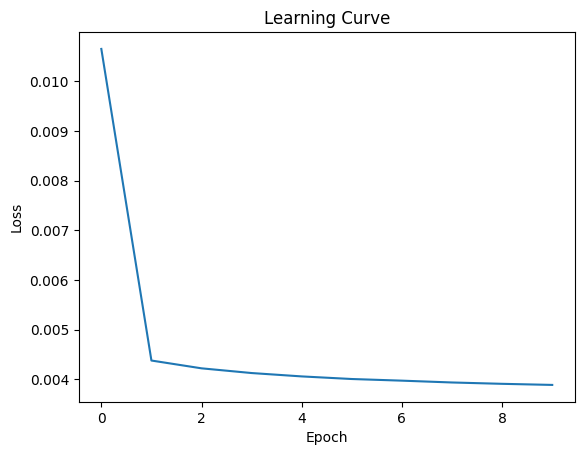

In [ ]:
noise_factor=0.25 #for fast training, the filter sizes are chosen as 3x3
                  #Since the filter sizes are not very large, ie 5x5, a smaller
                  #noise factor such as 0.25 rather then 0.5 would be best - according to Lecture Notes - NN9
autoencoder = Stacked_Autoencoder() #calls the same convolutional architecture
losses, trained_denoising_autoencoder = train_denoising(autoencoder, train_loader, num_epochs=10) #uses the denoising train function

In [ ]:
print(trained_denoising_autoencoder)

Stacked_Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): Sigmoid()
  )
)


#### Visualization

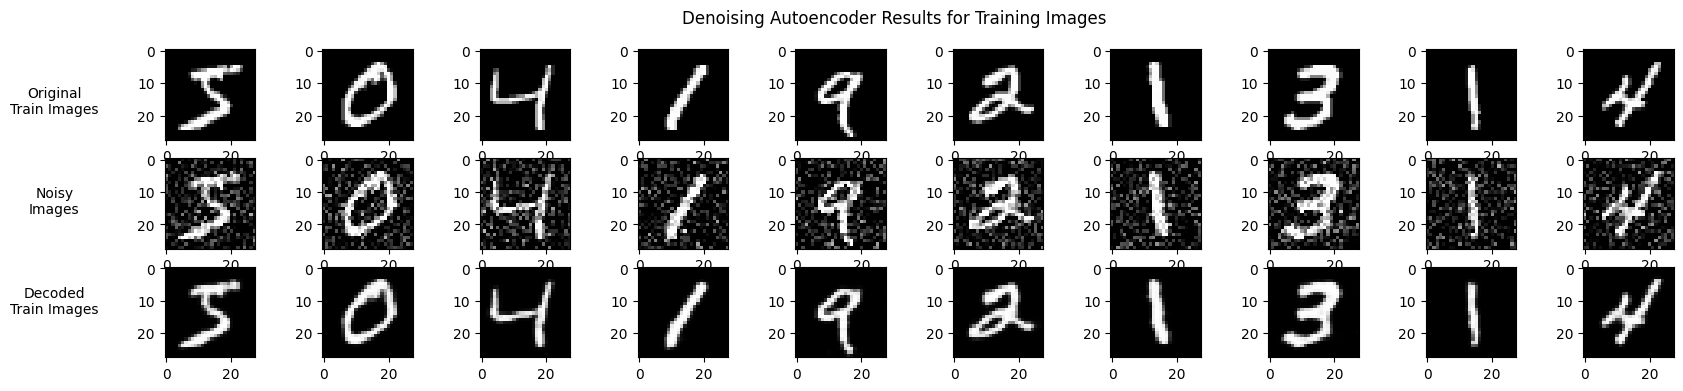

In [ ]:
# for train images

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_images = []
noisy_images = []

for i in range(10):
    img, label = train_dataset[i]
    img=img.to(device)
    train_images.append(img)
    noisy_img=add_noise(img,0.25, device)
    noisy_images.append(noisy_img)

train_images = torch.stack(train_images)
noisy_images=torch.stack(noisy_images) #adds noise
decoded_imgs = trained_denoising_autoencoder(noisy_images) #encodes&decodes noisy images

fig, axs = plt.subplots(3, 10, figsize=(20, 4))
fig.suptitle("Denoising Autoencoder Results for Training Images")
fig.text(0.08, 0.75, 'Original\nTrain Images', ha='center', va='center', rotation='horizontal')
fig.text(0.08, 0.5, 'Noisy\nImages', ha='center', va='center', rotation='horizontal')
fig.text(0.08, 0.25, 'Decoded\nTrain Images', ha='center', va='center', rotation='horizontal')

for i in range(10):
    axs[0][i].imshow((train_images[i].cpu()).squeeze(), cmap='gray') #original train images
    axs[1][i].imshow((noisy_images[i].cpu()).squeeze(), cmap='gray') # noisy train images
    axs[2][i].imshow((decoded_imgs[i].cpu()).detach().squeeze(), cmap='gray') #encoded&decoded noisy train images
plt.show()

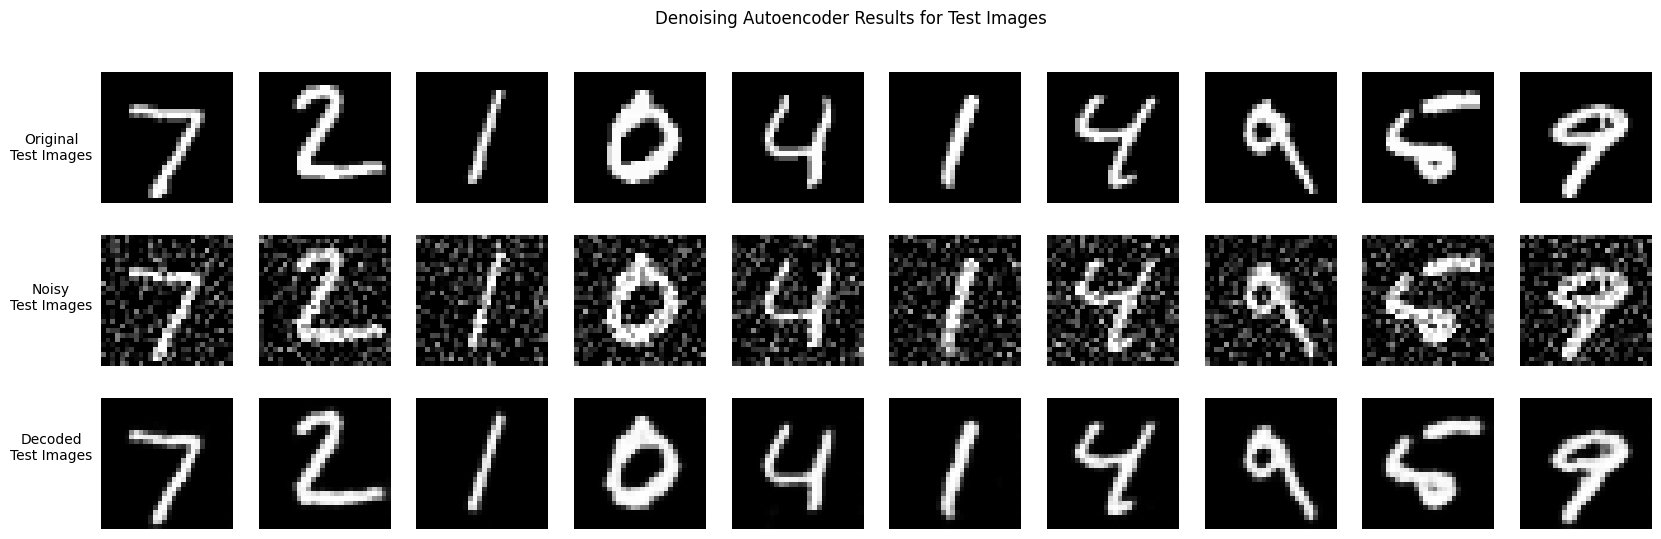

In [ ]:
# for test images

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_images = []
noisy_test_images = []
for i in range(10):
    img, label = test_dataset[i]
    img = img.to(device)
    noisy_img = add_noise(img, 0.25,device)
    test_images.append(img)
    noisy_test_images.append(noisy_img)

test_images = torch.stack(test_images)
noisy_test_images = torch.stack(noisy_test_images) #adds noise
decoded_imgs = trained_denoising_autoencoder(noisy_test_images) #encoded&decoded noisy test images

fig, axs = plt.subplots(3, 10, figsize=(20, 6))
fig.suptitle("Denoising Autoencoder Results for Test Images")
fig.text(0.1, 0.75, 'Original\nTest Images', ha='center', va='center', rotation='horizontal')
fig.text(0.1, 0.5, 'Noisy\nTest Images', ha='center', va='center', rotation='horizontal')
fig.text(0.1, 0.25, 'Decoded\nTest Images', ha='center', va='center', rotation='horizontal')

for i in range(10):
    axs[0][i].imshow(test_images[i].cpu().squeeze(), cmap='gray')  # original test images
    axs[1][i].imshow(noisy_test_images[i].cpu().squeeze(), cmap='gray')  # noisy test images
    axs[2][i].imshow(decoded_imgs[i].detach().cpu().squeeze(), cmap='gray')  # encoded&decoded noisy test images

for ax in axs.ravel():
    ax.axis('off')

plt.show()